In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('survey lung cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
data.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

# Label Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['GENDER']=le.fit_transform(data['GENDER'])
data['LUNG_CANCER']=le.fit_transform(data['LUNG_CANCER'])
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


# Split the data for Training & Testing

In [5]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [6]:
x.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (231, 15)

Training data-y- Shape:	 (231, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (78, 15)

Testing data(y-Outcome) Shape:	 (78, 1)


# Model Development with Logistic Regression Algorithm

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#invoke the log reg algorithm from sklearn
log_reg=LogisticRegression(solver='liblinear',verbose=2)
#Train the model
print('Training the model\n')
log_reg.fit(xtrain,ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))
print('********************Performance Measures for Logistic Regression Classification**************')
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report:\n',classification_report(ytest,ypred))
print('='*80)

Training the model

[LibLinear]Predicted Label for the input samples:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]

Testing is completed

Testing samples are: 	 78
********************Performance Measures for Logistic Regression Classification**************
Accuracy Score:	
 0.8589743589743589

Confusion Matrix:
 [[ 2 10]
 [ 1 65]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.17      0.27        12
           1       0.87      0.98      0.92        66

    accuracy                           0.86        78
   macro avg       0.77      0.58      0.59        78
weighted avg       0.84      0.86      0.82        78



C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': False}

# LDA

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=1)
x_lda_train = sklearn_lda.fit_transform(xtrain,ytrain)
x_lda_test = sklearn_lda.transform(xtest)

C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
x_lda_train

array([[-1.07416355e+00],
       [ 1.89342251e+00],
       [ 2.02717025e+00],
       [ 9.00965275e-01],
       [ 8.89188562e-01],
       [-5.69315937e-02],
       [-2.39269356e+00],
       [-1.20650216e+00],
       [-2.32832396e+00],
       [-1.59412569e-01],
       [-7.91580224e-01],
       [ 1.81458718e+00],
       [-8.50424868e-02],
       [-1.74706538e-02],
       [-6.21384274e-01],
       [ 2.66542698e+00],
       [ 2.39385442e+00],
       [ 4.01532801e-01],
       [-6.33810327e-01],
       [ 2.75000952e+00],
       [-3.84501598e-01],
       [ 4.06124911e-01],
       [-1.68761175e+00],
       [ 2.96213322e-01],
       [ 2.07863527e+00],
       [-2.20969060e-01],
       [-1.26570506e-01],
       [ 5.41368941e-02],
       [-2.69353025e-01],
       [ 3.32974048e-01],
       [-7.87757338e-01],
       [-1.76491969e+00],
       [-5.58576172e-01],
       [-1.24681313e+00],
       [-1.16974143e+00],
       [ 1.27660176e+00],
       [-1.97353812e-01],
       [-7.22036070e-01],
       [-7.7

In [12]:
print('Training the model\n')
log_reg.fit(x_lda_train,ytrain)
#Test the model
ypred=log_reg.predict(x_lda_test)
print('Predicted Label for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))
print('********************Performance Measures for Logistic Regression Classification**************')
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report:\n',classification_report(ytest,ypred))
print('='*80)

Training the model

[LibLinear]Predicted Label for the input samples:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]

Testing is completed

Testing samples are: 	 78
********************Performance Measures for Logistic Regression Classification**************
Accuracy Score:	
 0.8589743589743589

Confusion Matrix:
 [[ 2 10]
 [ 1 65]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.17      0.27        12
           1       0.87      0.98      0.92        66

    accuracy                           0.86        78
   macro avg       0.77      0.58      0.59        78
weighted avg       0.84      0.86      0.82        78



C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

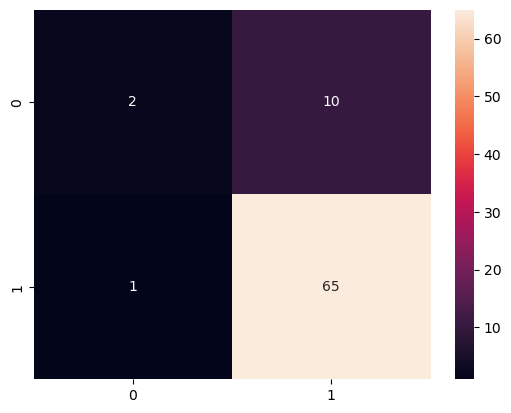

In [13]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)

# PCA

In [14]:
from sklearn.decomposition import PCA

# LDA
pca = PCA(n_components=2)
x_pca_train = pca.fit_transform(xtrain)
x_pca_test = pca.transform(xtest)

variance=pca.explained_variance_ratio_

In [15]:
variance

array([0.95413713, 0.00878745])

In [16]:
print('Training the model\n')
log_reg.fit(x_pca_train,ytrain)
#Test the model
ypred=log_reg.predict(x_pca_test)
print('Predicted Label for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))
print('********************Performance Measures for Logistic Regression Classification**************')
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report:\n',classification_report(ytest,ypred))
print('='*80)

Training the model

[LibLinear]Predicted Label for the input samples:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]

Testing is completed

Testing samples are: 	 78
********************Performance Measures for Logistic Regression Classification**************
Accuracy Score:	
 0.8461538461538461

Confusion Matrix:
 [[ 0 12]
 [ 0 66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.85      1.00      0.92        66

    accuracy                           0.85        78
   macro avg       0.42      0.50      0.46        78
weighted avg       0.72      0.85      0.78        78



C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarni

<Axes: >

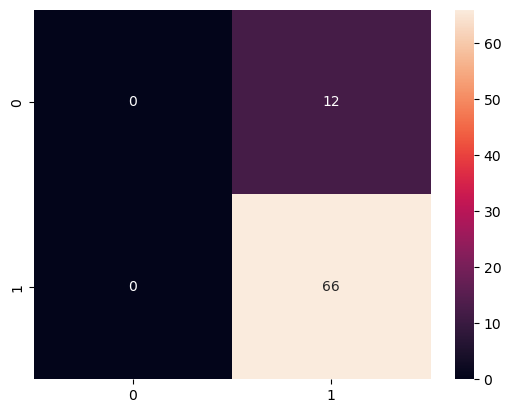

In [17]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)

# GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(log_reg,{'C':[1,5,10,20,30]},return_train_score=False)

clf.fit(xtrain,ytrain)

clf.cv_results_

C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

{'mean_fit_time': array([0.00721822, 0.00835147, 0.00800333, 0.00783405, 0.00810113]),
 'std_fit_time': array([0.00153449, 0.00136871, 0.00109721, 0.00162728, 0.00091544]),
 'mean_score_time': array([0.00571127, 0.00659614, 0.00700083, 0.00610952, 0.0056025 ]),
 'std_score_time': array([0.00083067, 0.00049266, 0.00063385, 0.00070236, 0.00048971]),
 'param_C': masked_array(data=[1, 5, 10, 20, 30],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1}, {'C': 5}, {'C': 10}, {'C': 20}, {'C': 30}],
 'split0_test_score': array([0.89361702, 0.93617021, 0.93617021, 0.93617021, 0.93617021]),
 'split1_test_score': array([0.86956522, 0.86956522, 0.89130435, 0.91304348, 0.91304348]),
 'split2_test_score': array([0.89130435, 0.93478261, 0.93478261, 0.95652174, 0.95652174]),
 'split3_test_score': array([0.93478261, 0.95652174, 0.95652174, 0.97826087, 0.97826087]),
 'split4_test_score': array([0.86956522, 0.86956522, 0.8913043

In [19]:
df=pd.DataFrame(clf.cv_results_)

In [20]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007218,0.001534,0.005711,0.000831,1,{'C': 1},0.893617,0.869565,0.891304,0.934783,0.869565,0.891767,0.023832,5
1,0.008351,0.001369,0.006596,0.000493,5,{'C': 5},0.936170,0.869565,0.934783,0.956522,0.869565,0.913321,0.036546,4
2,0.008003,0.001097,0.007001,0.000634,10,{'C': 10},0.936170,0.891304,0.934783,0.956522,0.891304,0.922017,0.026231,3
3,0.007834,0.001627,0.006110,0.000702,20,{'C': 20},0.936170,0.913043,0.956522,0.978261,0.913043,0.939408,0.025310,1
4,0.008101,0.000915,0.005603,0.000490,30,{'C': 30},0.936170,0.913043,0.956522,0.978261,0.913043,0.939408,0.025310,1


In [21]:
df[['param_C','mean_test_score']]

,param_C,mean_test_score
0,1,0.891767
1,5,0.913321
2,10,0.922017
3,20,0.939408
4,30,0.939408


In [22]:
clf.best_score_

0.9394079555966698

In [23]:
clf.best_params_

{'C': 20}

# RandomizedSearchCV

In [24]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(log_reg,{'C':[1,5,10,20,30]},return_train_score=False,n_iter=1)

rs.fit(xtrain,ytrain)

df=pd.DataFrame(clf.cv_results_)
df

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007218,0.001534,0.005711,0.000831,1,{'C': 1},0.893617,0.869565,0.891304,0.934783,0.869565,0.891767,0.023832,5
1,0.008351,0.001369,0.006596,0.000493,5,{'C': 5},0.936170,0.869565,0.934783,0.956522,0.869565,0.913321,0.036546,4
2,0.008003,0.001097,0.007001,0.000634,10,{'C': 10},0.936170,0.891304,0.934783,0.956522,0.891304,0.922017,0.026231,3
3,0.007834,0.001627,0.006110,0.000702,20,{'C': 20},0.936170,0.913043,0.956522,0.978261,0.913043,0.939408,0.025310,1
4,0.008101,0.000915,0.005603,0.000490,30,{'C': 30},0.936170,0.913043,0.956522,0.978261,0.913043,0.939408,0.025310,1


In [25]:
df[['param_C','mean_test_score']]

,param_C,mean_test_score
0,1,0.891767
1,5,0.913321
2,10,0.922017
3,20,0.939408
4,30,0.939408


# Feature Engineering Techniques - Scaling

In [26]:
x.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [27]:
from sklearn.preprocessing import StandardScaler
std_sc=StandardScaler()
sc_x=std_sc.fit_transform(x)

In [28]:
sc_x

array([[ 0.95257934,  0.77185028, -1.13529242, ...,  0.74873631,
         1.06350105,  0.892475  ],
       [ 0.95257934,  1.38182914,  0.88083033, ...,  0.74873631,
         1.06350105,  0.892475  ],
       [-1.04978132, -0.44810745, -1.13529242, ...,  0.74873631,
        -0.94029056,  0.892475  ],
       ...,
       [ 0.95257934, -0.57010322,  0.88083033, ..., -1.33558369,
        -0.94029056,  0.892475  ],
       [ 0.95257934,  0.52785873,  0.88083033, ...,  0.74873631,
        -0.94029056,  0.892475  ],
       [ 0.95257934, -0.08212013, -1.13529242, ..., -1.33558369,
         1.06350105, -1.12047956]])

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(sc_x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (231, 15)

Training data-y- Shape:	 (231, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (78, 15)

Testing data(y-Outcome) Shape:	 (78, 1)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#invoke the log reg algorithm from sklearn
log_reg=LogisticRegression(solver='liblinear',verbose=2)
#Train the model
print('Training the model\n')
log_reg.fit(xtrain,ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))
print('********************Performance Measures for Logistic Regression Class********')
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report:\n',classification_report(ytest,ypred))
print('='*80)

C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training the model

[LibLinear]Predicted Label for the input samples:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]

Testing is completed

Testing samples are: 	 78
********************Performance Measures for Logistic Regression Class********
Accuracy Score:	
 0.8717948717948718

Confusion Matrix:
 [[ 3  9]
 [ 1 65]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.25      0.38        12
           1       0.88      0.98      0.93        66

    accuracy                           0.87        78
   macro avg       0.81      0.62      0.65        78
weighted avg       0.86      0.87      0.84        78



# Min-Max Scaler

In [31]:
from sklearn.preprocessing import MinMaxScaler
mm_sc=MinMaxScaler()
mm_x=mm_sc.fit_transform(x)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(mm_x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (231, 15)

Training data-y- Shape:	 (231, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (78, 15)

Testing data(y-Outcome) Shape:	 (78, 1)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#invoke the log reg algorithm from sklearn
log_reg=LogisticRegression(solver='liblinear',verbose=2)
#Train the model
print('Training the model\n')
log_reg.fit(xtrain,ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))
print('********************Performance Measures for Logistic Regression Classfier*********')
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report:\n',classification_report(ytest,ypred))
print('='*80)


Training the model

[LibLinear]Predicted Label for the input samples:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]

Testing is completed

Testing samples are: 	 78
********************Performance Measures for Logistic Regression Classfier*********
Accuracy Score:	
 0.8589743589743589

Confusion Matrix:
 [[ 2 10]
 [ 1 65]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.17      0.27        12
           1       0.87      0.98      0.92        66

    accuracy                           0.86        78
   macro avg       0.77      0.58      0.59        78
weighted avg       0.84      0.86      0.82        78



C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Feature Engineering Techniques - Handling the imbalance data

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

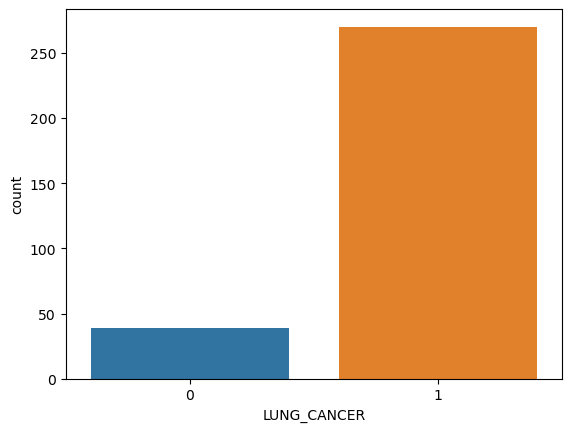

In [33]:
sns.countplot(data=data,x='LUNG_CANCER')

In [34]:
data['LUNG_CANCER'].value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

# upsample

Majority lenght:	 270

Minority Length:	 39
(540, 16)

Axes(0.125,0.11;0.775x0.77)


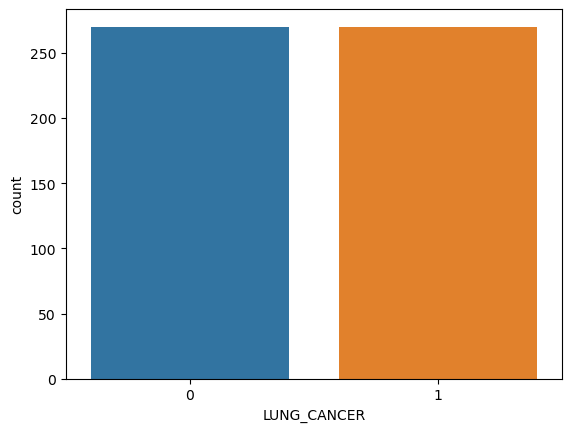

In [35]:
from sklearn.utils import resample
df_majority=data[data.LUNG_CANCER==1]
df_minority=data[data.LUNG_CANCER==0]
print('Majority lenght:\t',len(df_majority))
print()
print('Minority Length:\t',len(df_minority))
print('='*100)
#Upsample
df_minority_upsampled=resample(df_minority,
 replace=True, # sample with replacement
 n_samples=270, #to match the majority class
 random_state=12
 )
df_upsampled=pd.concat([df_majority,df_minority_upsampled])
print(df_upsampled.shape)
print()
print(sns.countplot(data=df_upsampled,x='LUNG_CANCER'))

In [36]:
df_upsampled.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
5,0,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
6,1,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
7,0,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1


In [37]:
x=df_upsampled.iloc[:,:-1]
y=df_upsampled.iloc[:,-1:]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (405, 15)

Training data-y- Shape:	 (405, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (135, 15)

Testing data(y-Outcome) Shape:	 (135, 1)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#invoke the log reg algorithm from sklearn
log_reg=LogisticRegression(solver='liblinear',verbose=2)
#Train the model
print('Training the model\n')
log_reg.fit(xtrain,ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))
print('********************Performance Measures for Logistic Regression Classfier*********')
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report:\n',classification_report(ytest,ypred))
print('='*80)

Training the model

[LibLinear]Predicted Label for the input samples:
 [1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1
 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0
 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1]

Testing is completed

Testing samples are: 	 135
********************Performance Measures for Logistic Regression Classfier*********
Accuracy Score:	
 0.8814814814814815

Confusion Matrix:
 [[55  6]
 [10 64]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87        61
           1       0.91      0.86      0.89        74

    accuracy                           0.88       135
   macro avg       0.88      0.88      0.88       135
weighted avg       0.88      0.88      0.88       135



C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# DownSample

Majority lenght:	 270

Minority Length:	 39
(78, 16)

Axes(0.125,0.11;0.775x0.77)


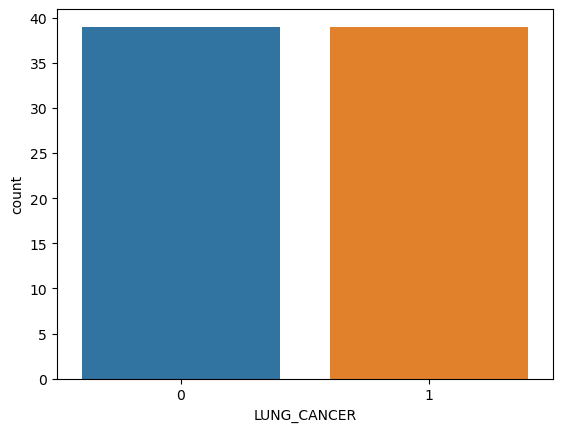

In [39]:
from sklearn.utils import resample
df_majority=data[data.LUNG_CANCER==1]
df_minority=data[data.LUNG_CANCER==0]
print('Majority lenght:\t',len(df_majority))
print()
print('Minority Length:\t',len(df_minority))
print('='*100)
#Upsample
df_majority_downsampled=resample(df_majority,
 replace=False, # sample with replacement
 n_samples=39, #to match the majority class
 random_state=12
 )
df_downsampled=pd.concat([df_minority,df_majority_downsampled])
print(df_downsampled.shape)
print()
print(sns.countplot(data=df_downsampled,x='LUNG_CANCER'))

In [40]:
x=df_downsampled.iloc[:,:-1]
y=df_downsampled.iloc[:,-1:]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (58, 15)

Training data-y- Shape:	 (58, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (20, 15)

Testing data(y-Outcome) Shape:	 (20, 1)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#invoke the log reg algorithm from sklearn
log_reg=LogisticRegression(solver='liblinear',verbose=2)
#Train the model
print('Training the model\n')
log_reg.fit(xtrain,ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))
print('********************Performance Measures for Logistic Regression Classfier*********')
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report:\n',classification_report(ytest,ypred))
print('='*80)

Training the model

[LibLinear]Predicted Label for the input samples:
 [0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1]

Testing is completed

Testing samples are: 	 20
********************Performance Measures for Logistic Regression Classfier*********
Accuracy Score:	
 0.75

Confusion Matrix:
 [[6 3]
 [2 9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.75      0.82      0.78        11

    accuracy                           0.75        20
   macro avg       0.75      0.74      0.74        20
weighted avg       0.75      0.75      0.75        20



C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# K-Fold Cross Validation

In [42]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)

#model=KNeighborsClassifier()

scores = cross_val_score(log_reg, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

accuracy_kfold = mean(scores)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.741 (0.169)
